In [144]:
# Import necessary libraries for data manipulation and analysis

import joblib
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [145]:
df  = pd.read_csv('dummydata.csv')

In [146]:
df.head()

,USER,DATE,Year,FIRST LOGIN,LAST LOGOUT,IS LATE
0,Esmaria,Aug. 25,2024,5:12 am,5:35 pm,No
1,Gizela,Aug. 25,2024,5:08 am,6:43 pm,No
2,Eleen,Aug. 25,2024,5:20 am,9:41 pm,No
3,Fredrika,Aug. 25,2024,5:43 am,3:41 pm,No
4,Geoffry,Aug. 25,2024,5:35 am,9:49 pm,No


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   USER         1000 non-null   object
 1   DATE         1000 non-null   object
 2   Year         1000 non-null   int64 
 3   FIRST LOGIN  1000 non-null   object
 4   LAST LOGOUT  1000 non-null   object
 5   IS LATE      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [148]:
df['Date'] = df['DATE'] + ', ' + df['Year'].astype(str)

In [149]:
df.head()

,USER,DATE,Year,FIRST LOGIN,LAST LOGOUT,IS LATE,Date
0,Esmaria,Aug. 25,2024,5:12 am,5:35 pm,No,"Aug. 25, 2024"
1,Gizela,Aug. 25,2024,5:08 am,6:43 pm,No,"Aug. 25, 2024"
2,Eleen,Aug. 25,2024,5:20 am,9:41 pm,No,"Aug. 25, 2024"
3,Fredrika,Aug. 25,2024,5:43 am,3:41 pm,No,"Aug. 25, 2024"
4,Geoffry,Aug. 25,2024,5:35 am,9:49 pm,No,"Aug. 25, 2024"


In [150]:
df = df.drop('DATE', axis=1)

In [151]:
df = df.drop('Year', axis=1)

In [152]:
df = df.drop('LAST LOGOUT', axis=1)

In [153]:
df

,USER,FIRST LOGIN,IS LATE,Date
0,Esmaria,5:12 am,No,"Aug. 25, 2024"
1,Gizela,5:08 am,No,"Aug. 25, 2024"
2,Eleen,5:20 am,No,"Aug. 25, 2024"
3,Fredrika,5:43 am,No,"Aug. 25, 2024"
4,Geoffry,5:35 am,No,"Aug. 25, 2024"
...,...,...,...,...
995,Raychel,10:03 am,Yes,"Aug. 25, 2024"
996,Aldous,10:50 am,Yes,"Aug. 26, 2024"
997,Bob,10:04 am,Yes,"Aug. 26, 2024"
998,Dalli,8:08 am,Yes,"Aug. 26, 2024"


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   USER         1000 non-null   object
 1   FIRST LOGIN  1000 non-null   object
 2   IS LATE      1000 non-null   object
 3   Date         1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [155]:
column_to_move = 'Date'

In [156]:
first_column = df.columns[0]
new_column_order = [first_column] + [column_to_move] + [col for col in df.columns if col not in [first_column, column_to_move]]

In [157]:
df = df[new_column_order]

In [158]:
df.head()

,USER,Date,FIRST LOGIN,IS LATE
0,Esmaria,"Aug. 25, 2024",5:12 am,No
1,Gizela,"Aug. 25, 2024",5:08 am,No
2,Eleen,"Aug. 25, 2024",5:20 am,No
3,Fredrika,"Aug. 25, 2024",5:43 am,No
4,Geoffry,"Aug. 25, 2024",5:35 am,No


In [159]:
df.rename(columns={'Date': 'DATE'}, inplace=True)

In [160]:
df

,USER,DATE,FIRST LOGIN,IS LATE
0,Esmaria,"Aug. 25, 2024",5:12 am,No
1,Gizela,"Aug. 25, 2024",5:08 am,No
2,Eleen,"Aug. 25, 2024",5:20 am,No
3,Fredrika,"Aug. 25, 2024",5:43 am,No
4,Geoffry,"Aug. 25, 2024",5:35 am,No
...,...,...,...,...
995,Raychel,"Aug. 25, 2024",10:03 am,Yes
996,Aldous,"Aug. 26, 2024",10:50 am,Yes
997,Bob,"Aug. 26, 2024",10:04 am,Yes
998,Dalli,"Aug. 26, 2024",8:08 am,Yes


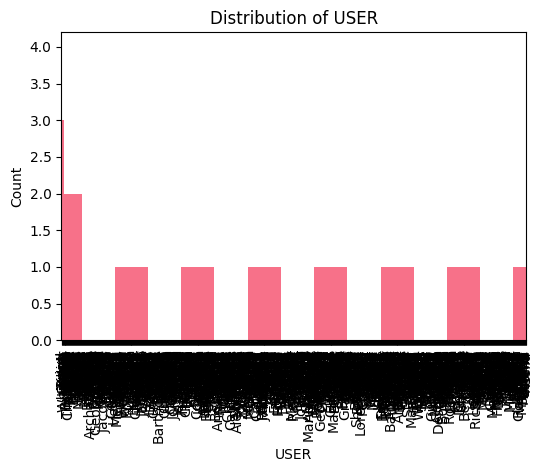

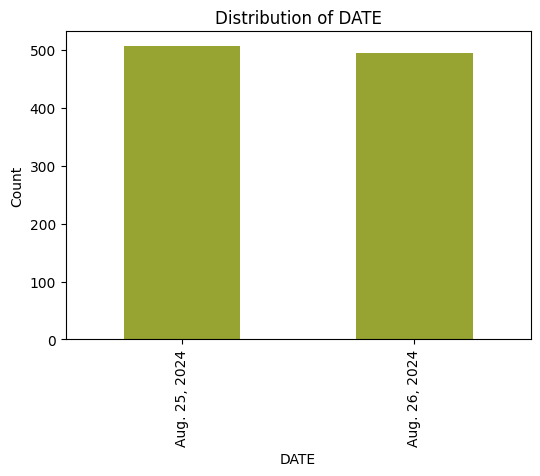

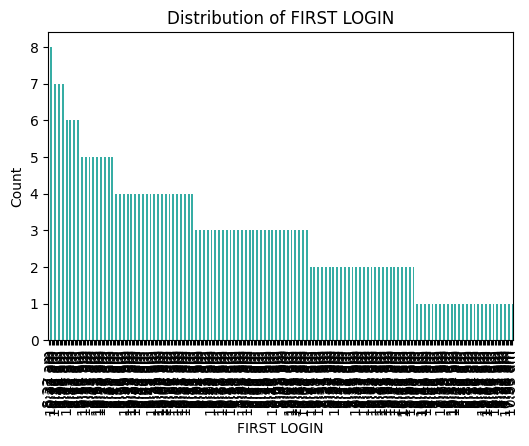

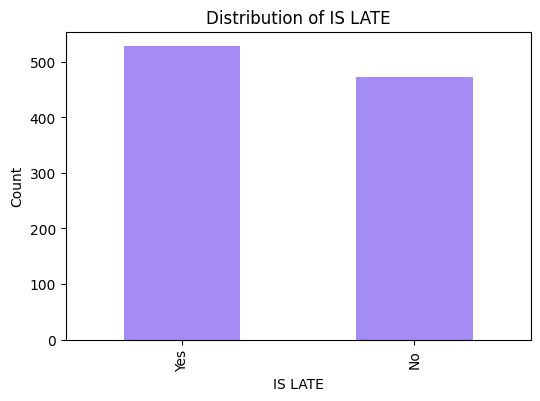

In [161]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Define a color palette
color_palette = sns.color_palette('husl', len(categorical_cols))

# Plot bar chart for each categorical column with colors
for index, col in enumerate(categorical_cols):
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar', color=color_palette[index])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

In [162]:
label_encoder = LabelEncoder()

In [163]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [164]:
# Save label encoders
joblib.dump(label_encoder, 'label_encoders.pkl')

['label_encoders.pkl']

In [165]:
df

,USER,DATE,FIRST LOGIN,IS LATE
0,321,0,75,0
1,414,0,71,0
2,298,0,83,0
3,372,0,105,0
4,389,0,98,0
...,...,...,...,...
995,757,0,2,1
996,15,1,46,1
997,104,1,3,1
998,227,1,238,1


In [166]:
# Splitting the data into features and target
X = df.drop(columns=['IS LATE'])
y = df['IS LATE']

In [167]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
# Decision Tree Regression

# Initialize Decision Tree Classifier with max depth of 2000
dtree = DecisionTreeClassifier(max_depth=2000)
# Fit the model on the training data

dtree.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = dtree.predict(X_test)

# Evaluate the Decision Tree Regression model using various metrics
print(f"""
Accuracy Score = {accuracy_score(y_pred,y_test)},
Precision Score = {precision_score(y_pred,y_test)},
Root Precision Score = {np.sqrt(precision_score(y_pred,y_test))},
F1 Score = {f1_score(y_pred,y_test)}
""")


Accuracy Score = 1.0,
Precision Score = 1.0,
Root Precision Score = 1.0,
F1 Score = 1.0



In [169]:
# Initialize and fit XGBoost Classifier with specified parameters

xgb_model = xgb.XGBClassifier(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict the target values on the test data using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model using various metrics
print(f"XGBoost Accuracy Score: {accuracy_score(y_test, y_pred_xgb)}")
print(f"XGBoost Precision Score: {precision_score(y_test, y_pred_xgb)}")
print(f"XGBoost F1 Score: {f1_score(y_test, y_pred_xgb)}")

XGBoost Accuracy Score: 1.0
XGBoost Precision Score: 1.0
XGBoost F1 Score: 1.0


In [170]:
# Initialize and fit AdaBoost Classifier with specified parameters

ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)


ada_model.fit(X_train, y_train)

# Predict the target values on the test data using AdaBoost
y_pred_ada = ada_model.predict(X_test)

# Evaluate the AdaBoost model using various metrics
print(f"AdaBoost Accuracy Score: {accuracy_score(y_test, y_pred_ada)}")
print(f"AdaBoost Precision Score: {precision_score(y_test, y_pred_ada)}")
print(f"AdaBoost F1 Score: {f1_score(y_test, y_pred_ada)}")

C:\Users\mcnob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy Score: 1.0
AdaBoost Precision Score: 1.0
AdaBoost F1 Score: 1.0


In [171]:
# Stacking Classifier

# Define base models for stacking
estimators = [
    ('dt', dtree)
]

# Initialize Stacking Classifier with Decision Tree as final estimator
stacking_model = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier
(max_depth=10000))

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predict the target values on the test data using the stacking model
y_pred = stacking_model.predict(X_test)

# Evaluate the Stacking Classifier model using various metrics
print(f"""
Accuracy Score = {accuracy_score(y_pred,y_test)},
Precision Score = {precision_score(y_pred,y_test)},
F1 Score = {f1_score(y_pred,y_test)}
""")


Accuracy Score = 1.0,
Precision Score = 1.0,
F1 Score = 1.0



In [172]:
# Cross-validation scores for the stacking model

cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)


# Print the mean and standard deviation of cross-validation scores
print(f"Mean CV Score (Negative MSE): {mean_cv_score}")
print(f"Standard Deviation of CV Scores: {std_cv_score}")

Mean CV Score (Negative MSE): 0.99875
Standard Deviation of CV Scores: 0.002499999999999991


In [173]:
# Grid search for hyperparameter tuning of the final estimator in the stacking model

param_grid = {
    'final_estimator__max_depth': [5, 10, 15, 20],
    'final_estimator__min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(stacking_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Best estimator from the grid search
test_model_1 = grid_search.best_estimator_

# Predict the target values on the test data using the best estimator
y_pred_best = test_model_1.predict(X_test)

# Evaluate the best estimator model using various metrics
print(f"Test Model 1 Accuracy Score: {accuracy_score(y_test, y_pred_best)}")
print(f"Test Model 1 Precision Score: {precision_score(y_test, y_pred_best)}")
print(f"Test Model 1 F1 Score: {f1_score(y_test, y_pred_best)}")

Test Model 1 Accuracy Score: 1.0
Test Model 1 Precision Score: 1.0
Test Model 1 F1 Score: 1.0


In [174]:
# Refined grid search for hyperparameter tuning of the best estimator

refined_param_grid = {
    'final_estimator__max_depth': [12, 15, 18],
    'final_estimator__min_samples_split': [5, 7, 10]
}

refined_grid_search = GridSearchCV(test_model_1, refined_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the refined grid search on the training data
refined_grid_search.fit(X_train, y_train)

# Best estimator from the refined grid search
test_model_2 = refined_grid_search.best_estimator_

# Fit the model on the training data
test_model_2.fit(X_train, y_train)

# Predict the target values on the test data using the model
y_pred_final = test_model_2.predict(X_test)

# Evaluate the model using various metrics
print(f"Test Model 2 Accuracy Score: {accuracy_score(y_test, y_pred_final)}")
print(f"Test Model 2 Precision Score: {precision_score(y_test, y_pred_final)}")
print(f"Test Model 2 F1 Score: {f1_score(y_test, y_pred_final)}")

Test Model 2 Accuracy Score: 1.0
Test Model 2 Precision Score: 1.0
Test Model 2 F1 Score: 1.0


In [175]:
# Define refined parameter grid for hyperparameter tuning of the final estimator in the stacking model

refined_param_grid = {
    'final_estimator__max_depth': [10, 15],
    'final_estimator__min_samples_split': [5, 10]
}

# Perform grid search with cross-validation to find the best hyperparameters for the final estimator
refined_grid_search = GridSearchCV(test_model_2, refined_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search on the training data
refined_grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
test_model_3 = refined_grid_search.best_estimator_

# Fit the best estimator on the training data
test_model_3.fit(X_train, y_train)

# Predict the target values on the test data using the best estimator
y_pred_final = test_model_3.predict(X_test)

# Evaluate the best estimator model using various metrics
print(f"Test Model 3 Accuracy Score: {accuracy_score(y_test, y_pred_final)}")
print(f"Test Model 3 Precision Score: {precision_score(y_test, y_pred_final)}")
print(f"Test Model 3 F1 Score: {f1_score(y_test, y_pred_final)}")

Test Model 3 Accuracy Score: 1.0
Test Model 3 Precision Score: 1.0
Test Model 3 F1 Score: 1.0


In [176]:
# Define base models for ensemble
models = [
    ('xgb', xgb_model),
    ('dt', DecisionTreeClassifier()),
    ('tmodel1', test_model_1),
    ('tmodel3', test_model_3),
    ('adaboost',ada_model)
]

# Initialize and fit Voting Classifier as ensemble model with base models
ensemble_model = VotingClassifier(estimators=models)

# Fit
ensemble_model.fit(X_train, y_train)

# Predict the target values on the test data using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model using various metrics
print(f"Ensemble Model Accuracy Score: {accuracy_score(y_test, y_pred_ensemble)}")
print(f"Ensemble Model Precision Score: {precision_score(y_test, y_pred_ensemble)}")
print(f"Ensemble Model F1 Score: {f1_score(y_test, y_pred_ensemble)}")

C:\Users\mcnob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ensemble Model Accuracy Score: 1.0
Ensemble Model Precision Score: 1.0
Ensemble Model F1 Score: 1.0


In [177]:
# Define parameter grid for Decision Tree Classifier

param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation to find the best hyperparameters for Decision Tree Classifier
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Get the best estimator from the grid search for Decision Tree Classifier
best_dt = grid_search_dt.best_estimator_

# Define parameter grid for AdaBoost Classifier
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Perform grid search with cross-validation to find the best hyperparameters for AdaBoost Classifier
grid_search_ada = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid_ada, cv=5)
grid_search_ada.fit(X_train, y_train)

# Get the best estimator from the grid search for AdaBoost Classifier
best_ada = grid_search_ada.best_estimator_

# Update the models list with the best estimators
models = [
    ('xgb', xgb_model),
    ('dt', best_dt),
    ('tmodel1', test_model_1),
    ('tmodel3', test_model_3),
    ('adaboost', best_ada)
]

# Ensemble model with weights
weights = [1, 1, 1, 1, 1]
ensemble_model = VotingClassifier(estimators=models, weights=weights)

# Fit the ensemble model on the training data and predict on the test data
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model using various metrics
print(f"Ensemble Model Accuracy Score: {accuracy_score(y_test, y_pred_ensemble)}")
print(f"Ensemble Model Precision Score: {precision_score(y_test, y_pred_ensemble)}")
print(f"Ensemble Model F1 Score: {f1_score(y_test, y_pred_ensemble)}")

C:\Users\mcnob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mcnob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mcnob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

Ensemble Model Accuracy Score: 1.0
Ensemble Model Precision Score: 1.0
Ensemble Model F1 Score: 1.0


In [178]:
# Define the parameter grid for Randomized Search on XGBoost model

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform randomized search with cross-validation for hyperparameter tuning of XGBoost model
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy',
                                   n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model from the randomized search
best_model = random_search.best_estimator_

# Predict the target values on the test data using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model using various metrics
print(f"Tuned Ensemble Model Accuracy Score: {accuracy_score(y_test, y_pred_best)}")
print(f"Tuned Ensemble Model Precision Score: {precision_score(y_test, y_pred_best)}")
print(f"Tuned Ensemble Model F1 Score: {f1_score(y_test, y_pred_best)}")

Tuned Ensemble Model Accuracy Score: 1.0
Tuned Ensemble Model Precision Score: 1.0
Tuned Ensemble Model F1 Score: 1.0


In [179]:
# Update the models list with the best models

models = [
    ('xgb', xgb_model),
    ('dt', DecisionTreeClassifier()),
    ('adaboost',ada_model),
    ('bm', best_model),
    ('bm2', ensemble_model)
]

# Initialize and fit a new Voting Classifier ensemble model with the updated models list
ensemble_model = VotingClassifier(estimators=models)
ensemble_model.fit(X_train, y_train)

# Predict the target values on the test data using the new ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the new ensemble model using various metrics
print(f"Ensemble Model Accuracy Score: {accuracy_score(y_test, y_pred_ensemble)}")
print(f"Ensemble Model Precision Score: {precision_score(y_test, y_pred_ensemble)}")
print(f"Ensemble Model F1 Score: {f1_score(y_test, y_pred_ensemble)}")

C:\Users\mcnob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mcnob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ensemble Model Accuracy Score: 1.0
Ensemble Model Precision Score: 1.0
Ensemble Model F1 Score: 1.0


In [180]:
# Save the final ensemble model
joblib.dump(ensemble_model, 'lateness_prediction_model.pkl')

['lateness_prediction_model.pkl']